In [1]:
import numpy as np

In [2]:
import pandas as pd
pd.options.display.max_columns = 200

In [3]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 13

In [6]:
df = pd.read_csv('data/GoT/battles.csv')
#df

<img src="images/winterIsComing.jpg">

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Самые агрессивные и самые забитые</h3> 
    </div>
</div>

Постройте <b>bar chart</b>, отражающий количества битв каждой из семей, сначала нарисуйте всех аттакующих, а на другой график поместите защищающихся. Столбцы должны быть отсортированы.
<br><br>
Выясните, кто нападал чаще всех и кому приходилось отбиваться чаще всех.

In [7]:
df[['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2']];

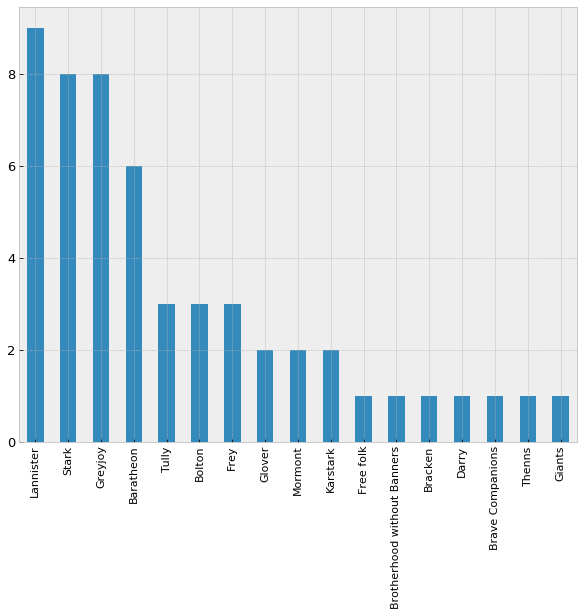

In [8]:
df.attacker_1.append(df.attacker_2).append(df.attacker_3).append(df.attacker_4).value_counts().plot(kind='bar')

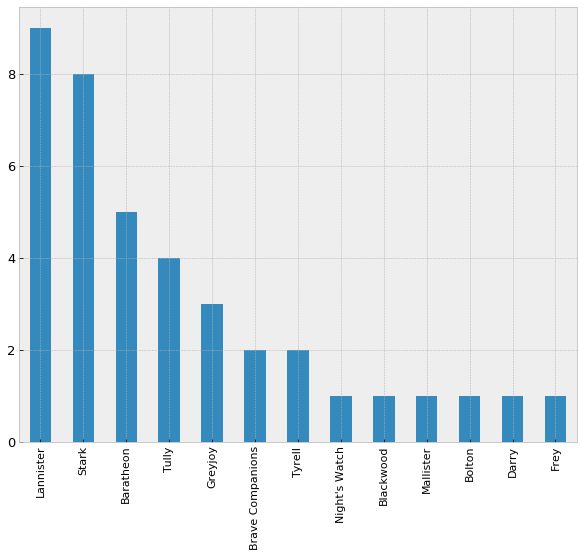

In [9]:
df.defender_1.append(df.defender_2).append(df.defender_3).append(df.defender_4).value_counts().plot(kind='bar')

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Кто дерется лучше всех?</h3> 
    </div>
</div>

Правильно сосчитайте количество побед и поражений у каждого из королей (__attacker_king__, __defender_king__).

Покажите их статистику как stacked bar plot, отсортировав столбцы по общему количество сражений.

In [10]:
df[['attacker_king', 'defender_king', 'attacker_outcome']];

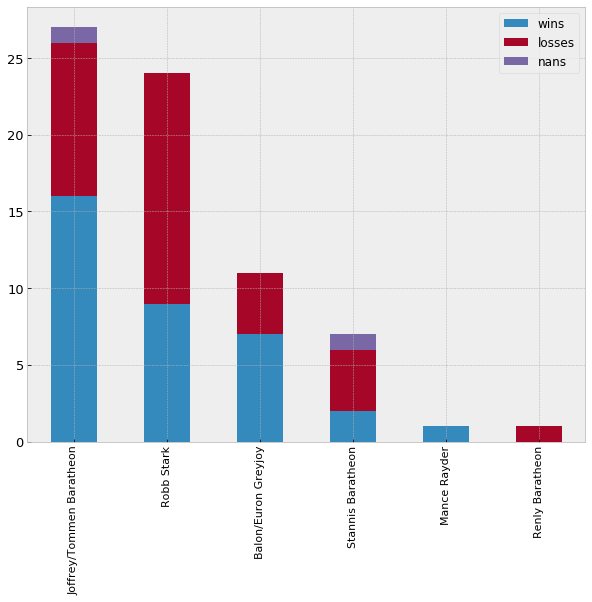

In [11]:
battles = df.attacker_king.append(df.defender_king).value_counts()
wins = df[df.attacker_outcome == 'win'].attacker_king\
    .append(df[df.attacker_outcome == 'loss'].defender_king)\
    .value_counts()
nans = df[df.attacker_outcome.isnull()].attacker_king\
    .append(df[df.attacker_outcome.isnull()].defender_king)\
    .value_counts()
    
df_res = pd.concat([battles, wins, nans], axis=1).fillna(0).astype(int)
df_res.columns = ['battles', 'wins', 'nans']
df_res['losses'] = df_res.battles - df_res.wins - df_res.nans
df_res = df_res.sort_values(by='battles', ascending=False)
df_res[['wins', 'losses', 'nans']].plot.bar(stacked=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Земля, залитая кровью</h3> 
    </div>
</div>

Представим, что в битве столкнулись отряды в 5000 и 15000 человек. Будем считать потери равными <i>2*min(5000, 15000) = 10000</i>. То есть, грубо говоря, всегда побеждает большинство, но из меньшей армии солдат с собой унесет еще хотя бы одного.

Теперь, зная, как высчитывать потери после боя, выясните, в каком конкретно регионе (__region__) и на какой местности (__location__) полегло больше людишек. Два графика: один - по регионам, второй - по месностям.

Проиллюстрируйте результаты с помощью __pie chart__.

In [12]:
df1 = df[['attacker_size', 'defender_size', 'region', 'location']]

In [13]:
min_col = df1.min(axis=1).fillna(0).rename('dead')*2
df_res = pd.concat([df1[['region', 'location']], min_col], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5bbb89c50>], dtype=object)

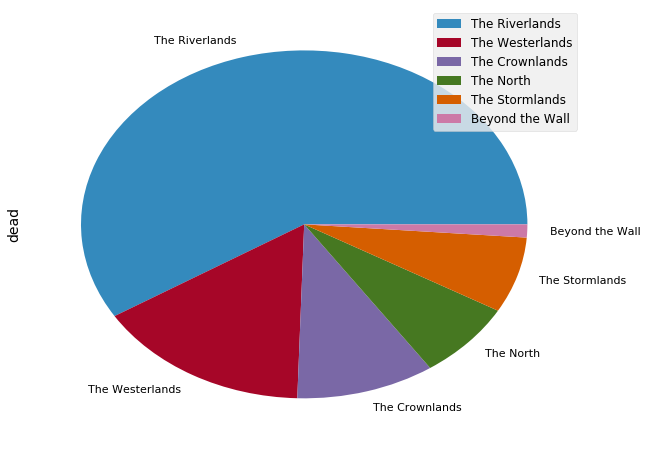

In [14]:
df_res.groupby('region').sum().sort_values(by='dead', ascending=False).plot(kind='pie', subplots=True)

In [15]:
df_res = df_res.groupby('location').sum()
other = df_res[df_res.dead < 2000].sum()
other.name = 'Other'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5bb9e2208>], dtype=object)

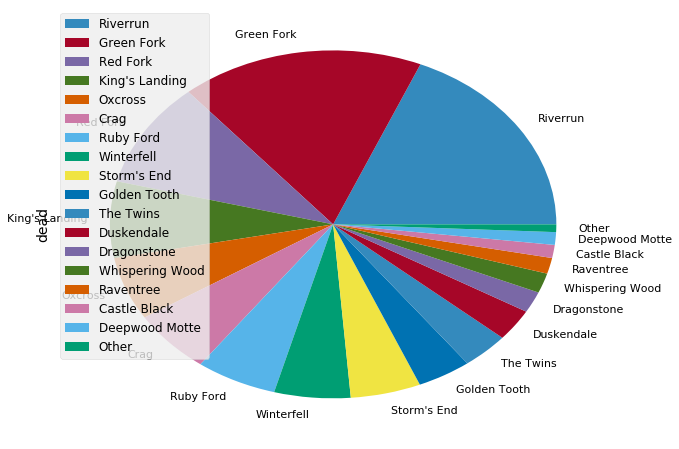

In [16]:
df_res[df_res.dead >= 2000].append(other).sort_values(by='dead', ascending=False).plot(kind='pie', subplots=True)